# Data cleaning

In [3]:
data_raw <- read.csv(
  "Predator_and_prey_body_sizes_in_marine_food_webs.csv",
  header = TRUE,
  sep = "\t",
  quote = "",
  check.names = TRUE,
  strip.white = TRUE,
  fileEncoding = "latin1"
)

cols_to_keep <- c("X.Record_number", "Individual_ID", "Predator",
                  "Predator._taxon", "Predator_lifestage",
                  "Type_of_feeding_interaction", "Standardised.predator.length",
                  "SI.predator.mass", "Diet.coverage",
                  "Prey", "Prey.taxon", "SI.prey.length", "SI.prey.mass",
                  "Geographic.location", "Latitude", "Longitude",
                  "Depth", "Mean.annual.temp", "SD.annual.temp",
                  "Mean.PP", "SD.PP", "Specific.habitat")

data <- data_raw[, cols_to_keep, drop = FALSE]

head(data)
names(data)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"entr'ee incorrecte trouv'ee dans la connexion en entr'ee 'Predator_and_prey_body_sizes_in_marine_food_webs.csv'"


,X.Record_number,Individual_ID,Predator,Predator._taxon,Predator_lifestage,Type_of_feeding_interaction,Standardised.predator.length,SI.predator.mass,Diet.coverage,Prey,...,SI.prey.mass,Geographic.location,Latitude,Longitude,Depth,Mean.annual.temp,SD.annual.temp,Mean.PP,SD.PP,Specific.habitat
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,...,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<chr>
1,"""1",1,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,93.990,1539.900,all,teleosts/molluscs/crustaceans,...,14.2740,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
2,"""2",2,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,95.195,1597.800,all,teleosts/molluscs/crustaceans,...,6.0213,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
3,"""3",3,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,100.020,1843.600,all,teleosts/molluscs/crustaceans,...,11.8930,"""""Apalachicola Bay"","" Florida""""","29""""nN","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
4,"""4",4,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,34.945,87.631,all,teleosts/molluscs/crustaceans,...,8.1220,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
5,"""5",5,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,31.330,63.866,all,teleosts/molluscs/crustaceans,...,6.5623,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
6,"""6",6,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,33.740,79.161,all,teleosts/molluscs/crustaceans,...,5.4065,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay


[1] "X.Record_number"              "Individual_ID"               
 [3] "Predator"                     "Predator._taxon"             
 [5] "Predator_lifestage"           "Type_of_feeding_interaction" 
 [7] "Standardised.predator.length" "SI.predator.mass"            
 [9] "Diet.coverage"                "Prey"                        
[11] "Prey.taxon"                   "SI.prey.length"              
[13] "SI.prey.mass"                 "Geographic.location"         
[15] "Latitude"                     "Longitude"                   
[17] "Depth"                        "Mean.annual.temp"            
[19] "SD.annual.temp"               "Mean.PP"                     
[21] "SD.PP"                        "Specific.habitat"

# Data visualization

In [9]:
install.packages("tidyverse")   
install.packages("ggplot2")
install.packages("reshape2")
install.packages("reshape2")  

installation des d'ependances 'S7', 'ggplot2'


Warning message in install.packages("tidyverse"):
"l'installation du package 'S7' a eu un statut de sortie non nul"
Warning message in install.packages("tidyverse"):
"l'installation du package 'ggplot2' a eu un statut de sortie non nul"
Warning message in install.packages("tidyverse"):
"l'installation du package 'tidyverse' a eu un statut de sortie non nul"
Mise `a jour de la liste HTML des packages dans '.Library'

Making 'packages.html' ...
 termin'e

installation de la d'ependance 'S7'


Warning message in install.packages("ggplot2"):
"l'installation du package 'S7' a eu un statut de sortie non nul"
Warning message in install.packages("ggplot2"):
"l'installation du package 'ggplot2' a eu un statut de sortie non nul"
Mise `a jour de la liste HTML des packages dans '.Library'

Making 'packages.html' ...
 termin'e

Warning message in install.packages("reshape2"):
"l'installation du package 'reshape2' a eu un statut de sortie non nul"
Mise

### Predator size vs prey size

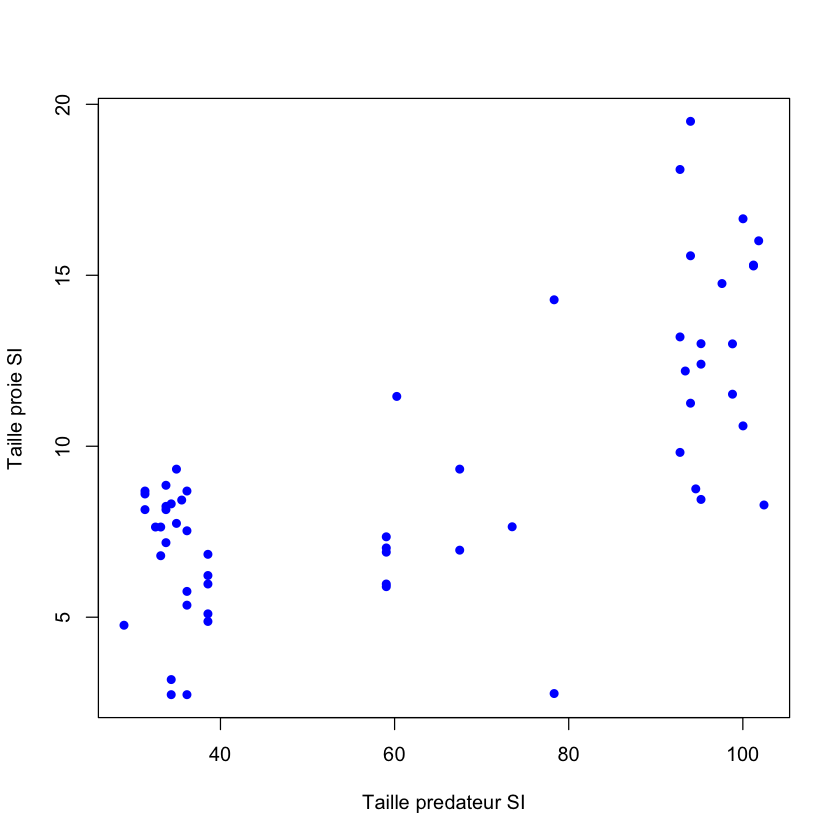

In [6]:
plot(
  x = data$Standardised.predator.length,
  y = data$SI.prey.length,
  xlab = "Taille predateur SI",
  ylab = "Taille proie SI",
  col = "blue", pch = 16,
  xlim = range(data$Standardised.predator.length, na.rm = TRUE),
  ylim = range(data$SI.prey.length, na.rm = TRUE)
)

Histogram

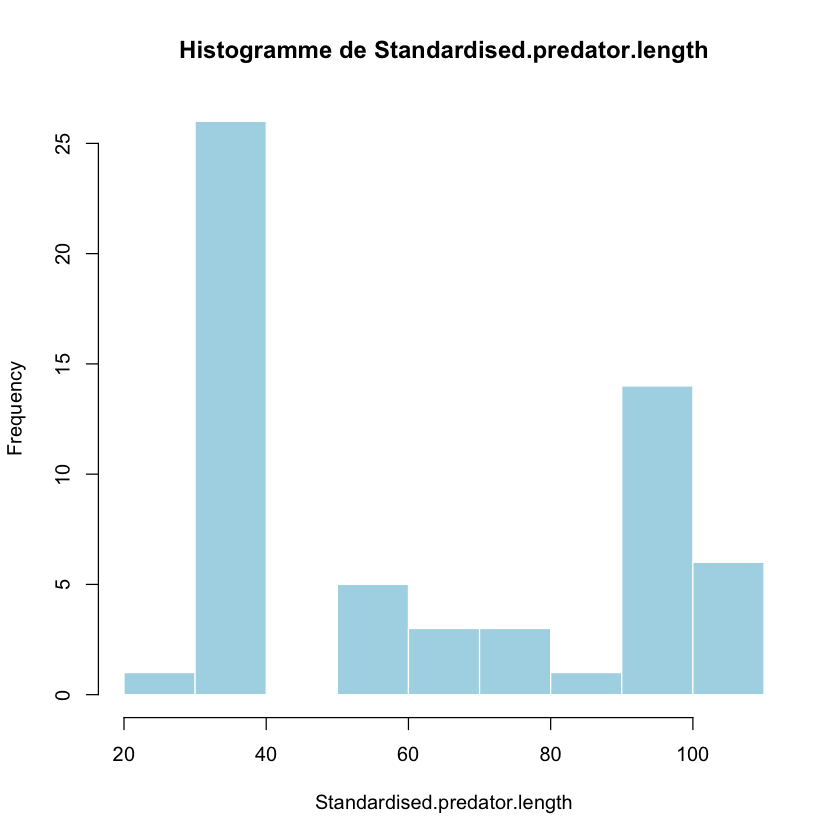

Skewness de Standardised.predator.length : 0.2078568 


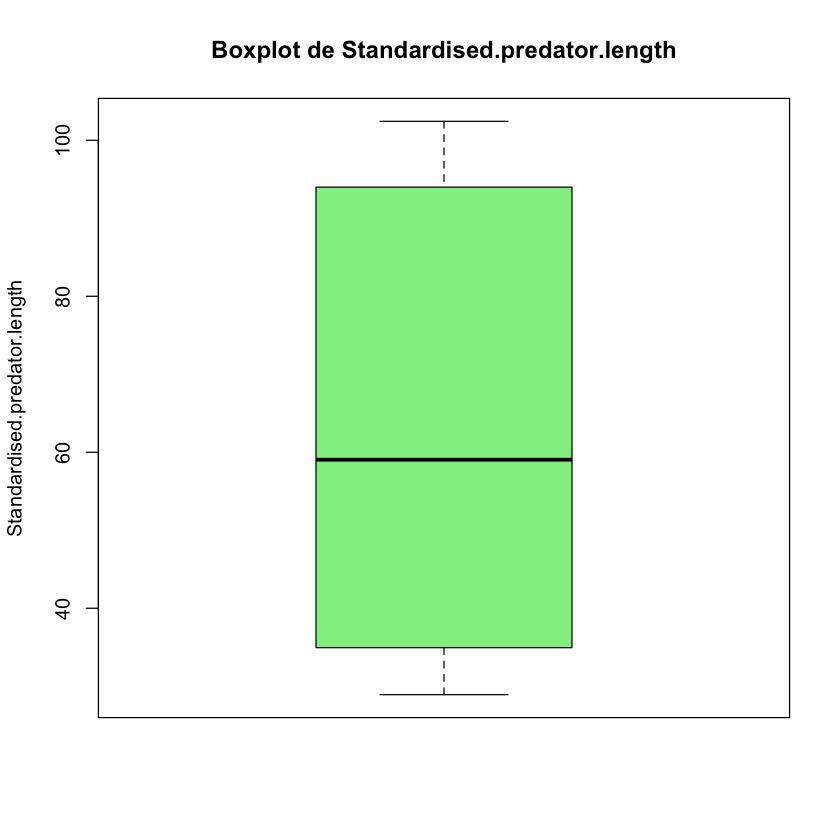

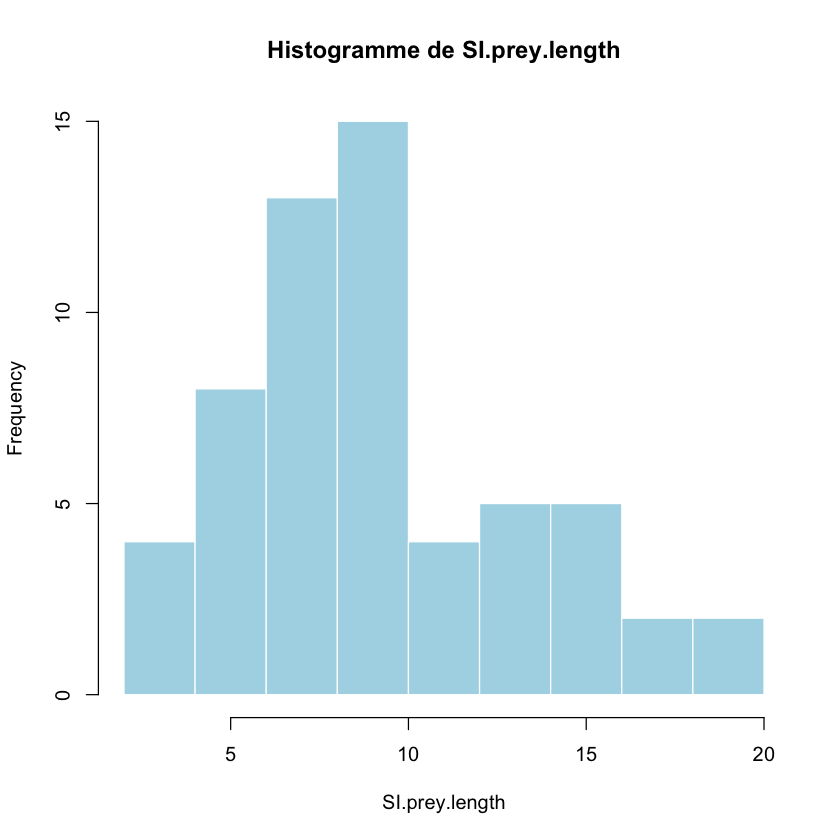

Skewness de SI.prey.length : 0.6453146 


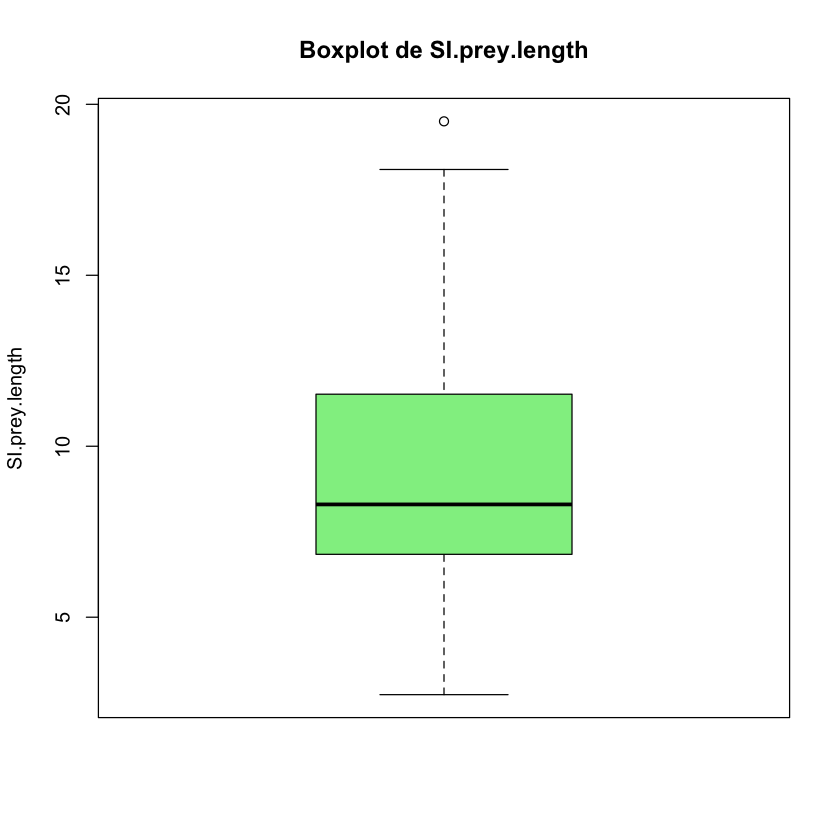

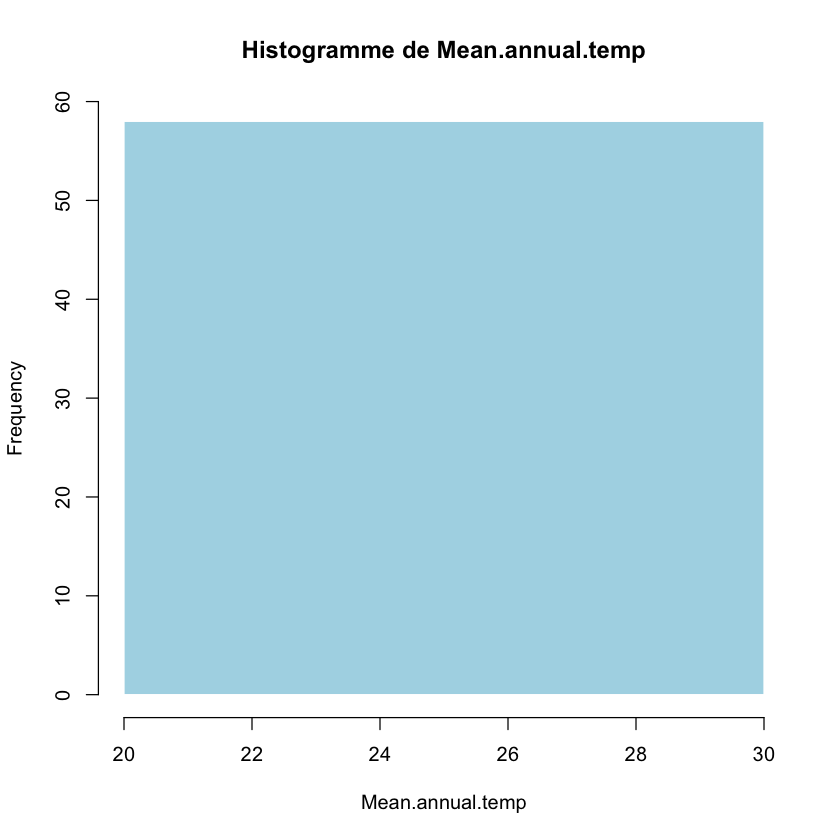

Skewness de Mean.annual.temp : NaN 


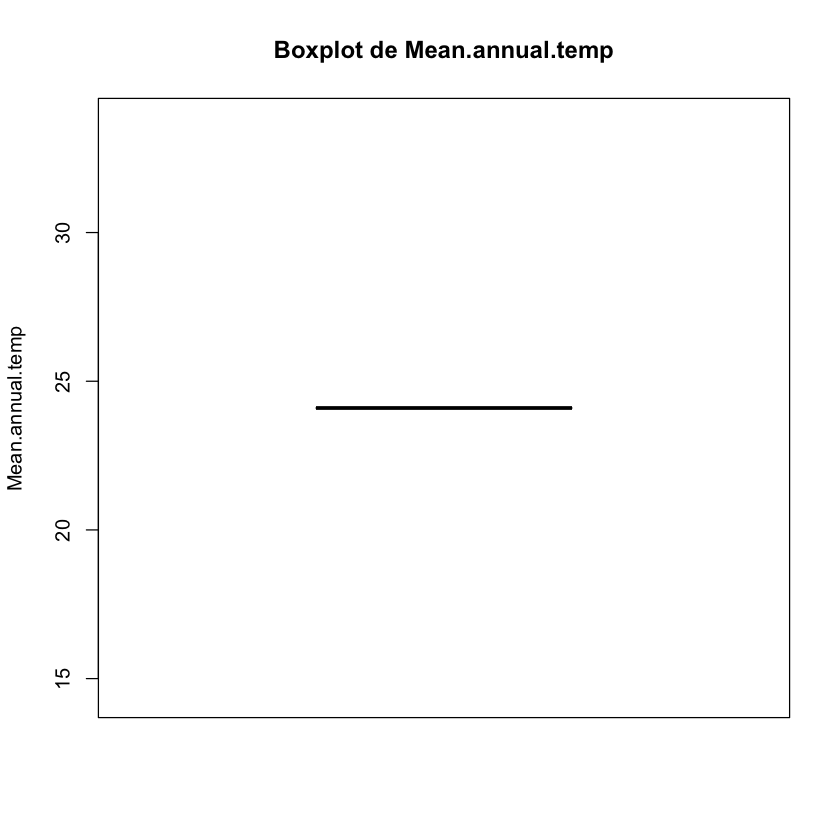

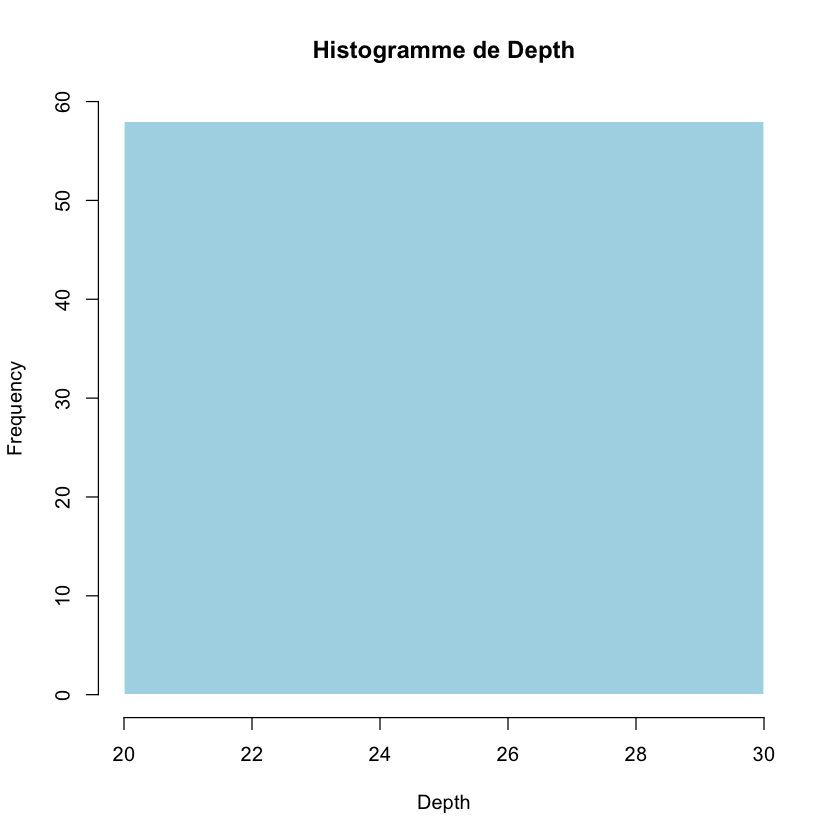

Skewness de Depth : NaN 


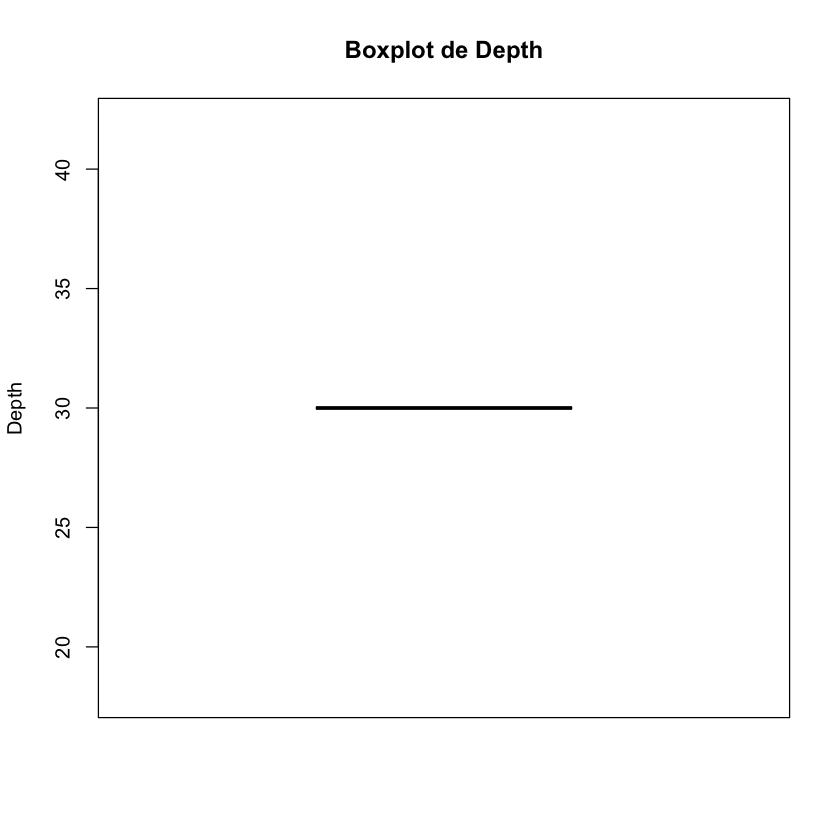

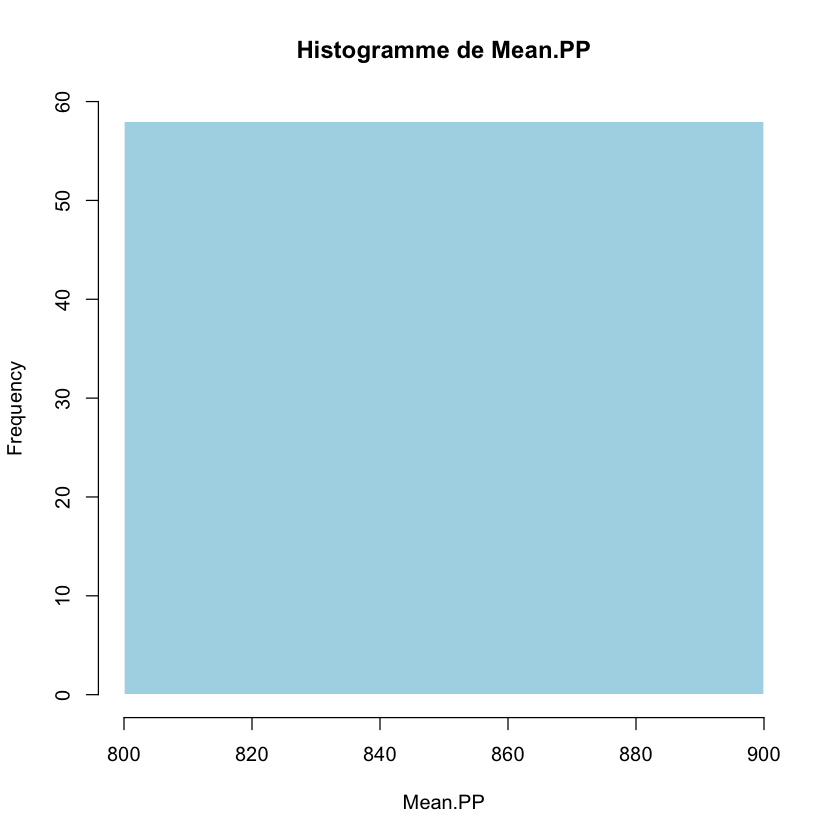

Skewness de Mean.PP : NaN 


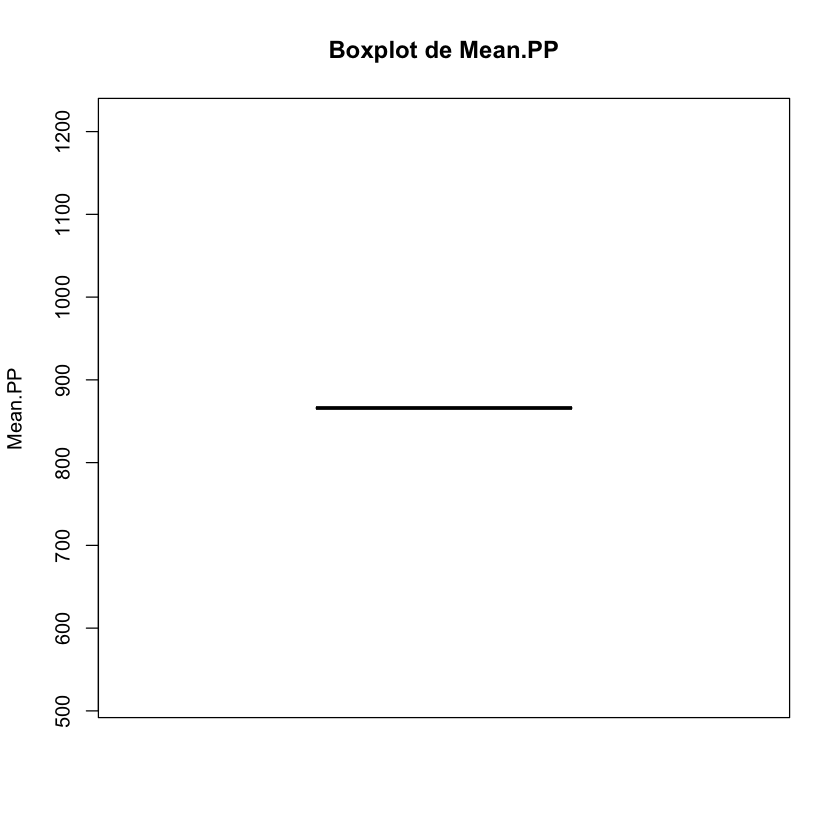

In [12]:
numeric_cols <- c("Standardised.predator.length", "SI.prey.length", "Mean.annual.temp", "Depth", "Mean.PP")

for (col in numeric_cols) {
  values <- data[[col]]
  values <- values[!is.na(values)]
  
  if (length(values) > 0) {
    # Histogramme
    hist(values, main=paste("Histogramme de", col), xlab=col,
         col = "lightblue", border="white")
    
    # Boxplot
    boxplot(values, main = paste("Boxplot de", col), ylab=col, col="lightgreen")
    
    # Skewness test simple
    skew <- sum((values - mean(values))^3 / length(values)) / (sd(values)^3)
    cat("Skewness de", col, ":", skew, "\n")
  }
}

### Temperature vs location

In [13]:
names(data)

[1] "X.Record_number"              "Individual_ID"               
 [3] "Predator"                     "Predator._taxon"             
 [5] "Predator_lifestage"           "Type_of_feeding_interaction" 
 [7] "Standardised.predator.length" "SI.predator.mass"            
 [9] "Diet.coverage"                "Prey"                        
[11] "Prey.taxon"                   "SI.prey.length"              
[13] "SI.prey.mass"                 "Geographic.location"         
[15] "Latitude"                     "Longitude"                   
[17] "Depth"                        "Mean.annual.temp"            
[19] "SD.annual.temp"               "Mean.PP"                     
[21] "SD.PP"                        "Specific.habitat"

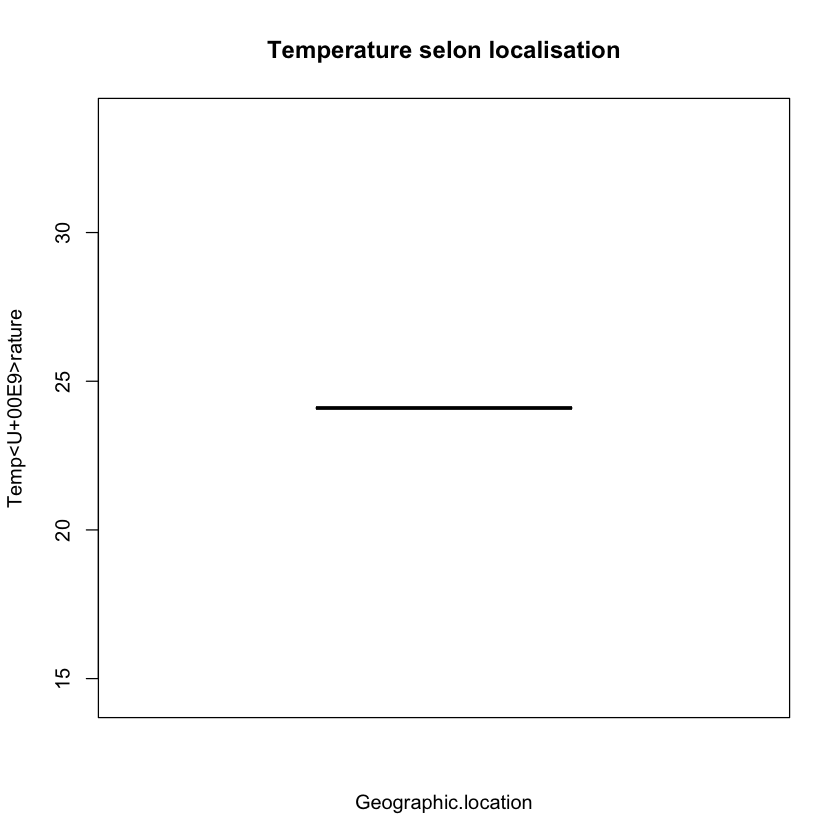

In [ ]:
data_temp <- subset(data, !is.na(Mean.annual.temp) & !is.na(Geographic.location))
boxplot(Mean.annual.temp ~ Geographic.location, data=data_temp,
        col="lightpink", main="Temperature selon localisation",
        ylab="Temperature")